# Estimación de párametros del modelo SIR usando un AG

In [13]:
# Librerias necesarias para resolver numéricamente el sistema de ecuaciones

from scipy.integrate import odeint
from scipy.interpolate import interp1d  # Para suavizar las curvas de las soluciones numericas

import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Librerías necesarias para el algoritmo genético

from deap import base
from deap import creator
from deap import tools

import random

# Módulo para implementar elitismo

import elitism

### Optimización con el algoritmo genético

In [14]:
# problem constants:
DIMENSIONS = 2  # number of dimensions
BOUND_LOW, BOUND_UP = 0.0, 1.0  # boundaries for all dimensions

In [15]:
# Genetic Algorithm constants:
POPULATION_SIZE = 100
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.45  # (try also 0.5) probability for mutating an individual
MAX_GENERATIONS = 500
HALL_OF_FAME_SIZE = 1
CROWDING_FACTOR = 1.0  # crowding factor for crossover and mutation

# set the random seed:
#RANDOM_SEED = 42
#random.seed(RANDOM_SEED)

In [16]:
toolbox = base.Toolbox()

In [17]:
# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

In [18]:
# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

In [19]:
# helper function for creating random real numbers uniformly distributed within a given range [low, up]
# it assumes that the range is the same for every dimension
def randomFloat(low, up):
    return [random.uniform(l, u) for l, u in zip([low] * DIMENSIONS, [up] * DIMENSIONS)]

In [20]:
# create an operator that randomly returns a float in the desired range and dimension:
toolbox.register("attrFloat", randomFloat, BOUND_LOW, BOUND_UP)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.attrFloat)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

In [21]:
# Sistema de ecuaciones del modelo SIR.
def deriv(Y, t, N, a, b):
    S, I, R = Y
    dSdt = -a * S * I
    dIdt = a * S * I - b * I
    dRdt = b * I
    return dSdt, dIdt, dRdt

In [22]:
# Esta funcion calcula la distancia Manhattan entre los datos numericos y los reales.

def manhattan(individual):
    x = individual[0]
    y = individual[1]

    N = 763

    I0, R0 = 1, 0
    S0 = N - I0 - R0
    t = np.linspace(0, 15, 15)
    
    y0 = S0, I0, R0

    ret = odeint(deriv, y0, t, args=(N, x, y))
    S, I, R = ret.T

    
#    delta = np.absolute(ret.T[1] - datos_school)
#    f = np.sum(delta)
        
    delta = (np.absolute(ret.T[1] - datos_school)**2)/ret.T[1]
    f = np.sum(delta)
   
    return f,

In [23]:
datos_school = [1, 3, 6, 25, 73, 222, 294, 258, 237, 191, 125, 69, 27, 11, 4 ]

In [24]:
toolbox.register("evaluate", manhattan)

# genetic operators:
toolbox.register("select", tools.selTournament, tournsize=2)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR)
toolbox.register("mutate", tools.mutPolynomialBounded, low=BOUND_LOW, up=BOUND_UP, eta=CROWDING_FACTOR,
                 indpb=1.0/DIMENSIONS)

gen	nevals	min    	avg   
0  	100   	1941.34	382624
1  	93    	1941.2 	134767
2  	91    	1941.2 	70085.4
3  	93    	1941.08	36704  
4  	94    	1583.93	9236   
5  	90    	1583.93	32803.6
6  	93    	1583.93	24081.3
7  	95    	1489.86	34075.9
8  	91    	1489.86	28082.1
9  	95    	1489.86	11027.4
10 	95    	1487.23	51859.6
11 	92    	1081.37	30694.4
12 	97    	1081.37	26190.5
13 	97    	1064.92	37719.9
14 	89    	1047.8 	7968.67
15 	89    	934.174	13185.7
16 	99    	651.206	80387  
17 	97    	379.569	41948.8
18 	89    	379.569	43412.9
19 	96    	379.569	30527.4
20 	91    	379.569	65000.5
21 	97    	102.808	66823.5
22 	93    	102.808	22072.8
23 	87    	102.808	553588 
24 	96    	102.808	40307.2
25 	94    	102.808	62058.6
26 	91    	102.808	141744 
27 	89    	81.0933	22823.5
28 	92    	81.0933	11419.3
29 	92    	81.0933	79542.2
30 	93    	81.0933	86385.1
31 	97    	81.0933	39760.9
32 	90    	81.0933	54183.3
33 	93    	73.2028	15246.1
34 	90    	73.2028	34785  
35 	97    	73.2028	3.54763e+06


270	97    	68.9115	59790.1    
271	93    	68.9115	4.26628e+06
272	96    	68.9115	97034.9    
273	95    	68.9115	518106     
274	97    	68.9115	97116.5    
275	95    	68.9115	42398.4    
276	93    	68.9115	46866.8    
277	92    	68.9115	26014.1    
278	93    	68.9115	63895.9    
279	97    	68.9115	157186     
280	93    	68.9115	138793     
281	93    	68.9115	326515     
282	91    	68.9115	23166.4    
283	87    	68.9115	152753     
284	91    	68.9115	131475     
285	94    	68.9115	46356.3    
286	89    	68.9115	102636     
287	93    	68.9115	57281.6    
288	97    	68.9115	125801     
289	95    	68.9115	1.15168e+06
290	95    	68.9115	474151     
291	94    	68.9115	1.06151e+06
292	92    	68.9115	41661.1    
293	89    	68.9115	1.3642e+06 
294	94    	68.9115	3.25205e+06
295	90    	68.9115	235268     
296	91    	68.9115	14284.1    
297	92    	68.9115	525743     
298	95    	68.9115	1.38705e+06
299	93    	68.9115	8.06489e+06
300	96    	68.9115	1.11555e+06
301	94    	68.9115	170296     
302	90  

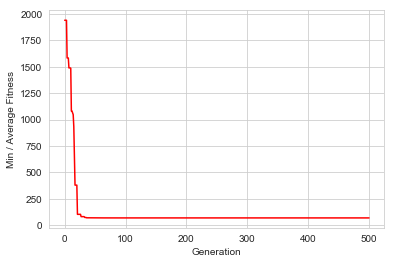

In [25]:
# Genetic Algorithm flow:
def main():

    # create initial population (generation 0):
    population = toolbox.populationCreator(n=POPULATION_SIZE)

    # prepare the statistics object:
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("min", np.min)
    stats.register("avg", np.mean)

    # define the hall-of-fame object:
    hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

    # perform the Genetic Algorithm flow with elitism:
    population, logbook = elitism.eaSimpleWithElitism(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                              ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

    # print info for best solution found:
    best = hof.items[0]
    print("-- Best Individual = ", best)
    print("-- Best Fitness = ", best.fitness.values[0])

    # extract statistics:
    minFitnessValues, meanFitnessValues = logbook.select("min", "avg")

    # plot statistics:
    sns.set_style("whitegrid")
    plt.plot(minFitnessValues, color='red')
#    plt.plot(meanFitnessValues, color='green')
    plt.xlabel('Generation')
    plt.ylabel('Min / Average Fitness')
    plt.savefig('GA_Evolution_1.png')
    #plt.title('Min and Average fitness over Generations')

    plt.show()


if __name__ == "__main__": 
    main()

In [35]:
def funcion_objetivo(x_0, x_1):
    
    N = 763
    I0, R0 = 1, 0
    S0 = N - I0 - R0
    t = np.linspace(0, 15, 15)
    
    y0 = S0, I0, R0

    
    def deriv(y, t, N, beta, gamma):
        S, I, R = y
        dSdt = -beta * S * I
        dIdt = beta * S * I - gamma * I
        dRdt = gamma * I
        return dSdt, dIdt, dRdt

    ret = odeint(deriv, y0, t, args=(N, x_0, x_1))
    S, I, R = ret.T
    

#    datos = ret.T[1]
#    print(ret.T[1])
    
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow='line')
    ax.plot(datos_school, 'ro', alpha=0.5, lw=2, label='Data')
#    ax.plot(t, ret.T[1], 'b', alpha=0.5, lw=2, label='Best fitness')
    f2 = interp1d(t, ret.T[1], kind='cubic')
    t = np.linspace(0, 15, num=101)
    ax.plot(t, f2(t), 'b', alpha=0.5, lw=2, label='Best fit')
    ax.set_xlabel('t', fontsize=15)
    ax.set_ylabel('I(t)', fontsize=15)
    #ax.set_title("GA's approximation", fontsize=15)
    ax.legend()
    plt.grid(b = False)
    fig.savefig('best_fit.png')
    plt.show()
    
    delta = np.absolute(ret.T[1] - datos_school)
    manhattan = np.sum(delta)
    f = manhattan
    
    return(f)

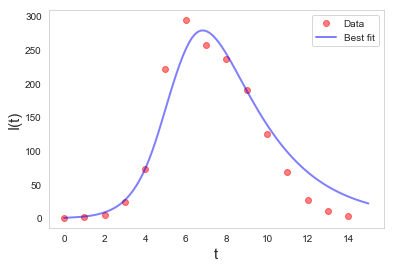

233.9151391733525

In [36]:
#funcion_objetivo(0.00218, 0.4436)
funcion_objetivo(0.002047488430022274, 0.4355147691971053)